In [42]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn 

from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
bikerental = pd.read_csv('day.csv')
bikerental.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bikerental.shape

(730, 16)

In [4]:
bikerental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bikerental.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Since Instant, dteday, Casual and registered is not required drop those columns
bikerental = bikerental.drop(columns=['instant', 'dteday', 'casual', 'registered'], axis=1)
bikerental.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Put Data in Proper Format

In [7]:
bikerental['season'].replace({1: "spring", 2: "summer", 3: "fall", 4: "winter"}, inplace=True)
bikerental.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [8]:
bikerental['weathersit'].replace({1: "Clear/Partly Cloudy", 2: "Mist + Cloudy", 3: "Light Snow/Rain", 4: "Heavy Rain/Thunderstorm"}, inplace=True)
bikerental.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear/Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear/Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
# Convert Weekday from 0-6 to Sunday to Saturday
bikerental['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"}, inplace=True)
bikerental.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear/Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear/Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
bikerental['mnth'].replace({1: "January", 2: "February", 3: "March", 4: "April", 5: "May",
                           6: "June", 7: "July", 8: "August", 9: "September", 10: "October",
                           11: "November", 12: "December"}, inplace=True)
bikerental.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,Clear/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,Clear/Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,Clear/Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
bikerental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


#### Visualize the Data

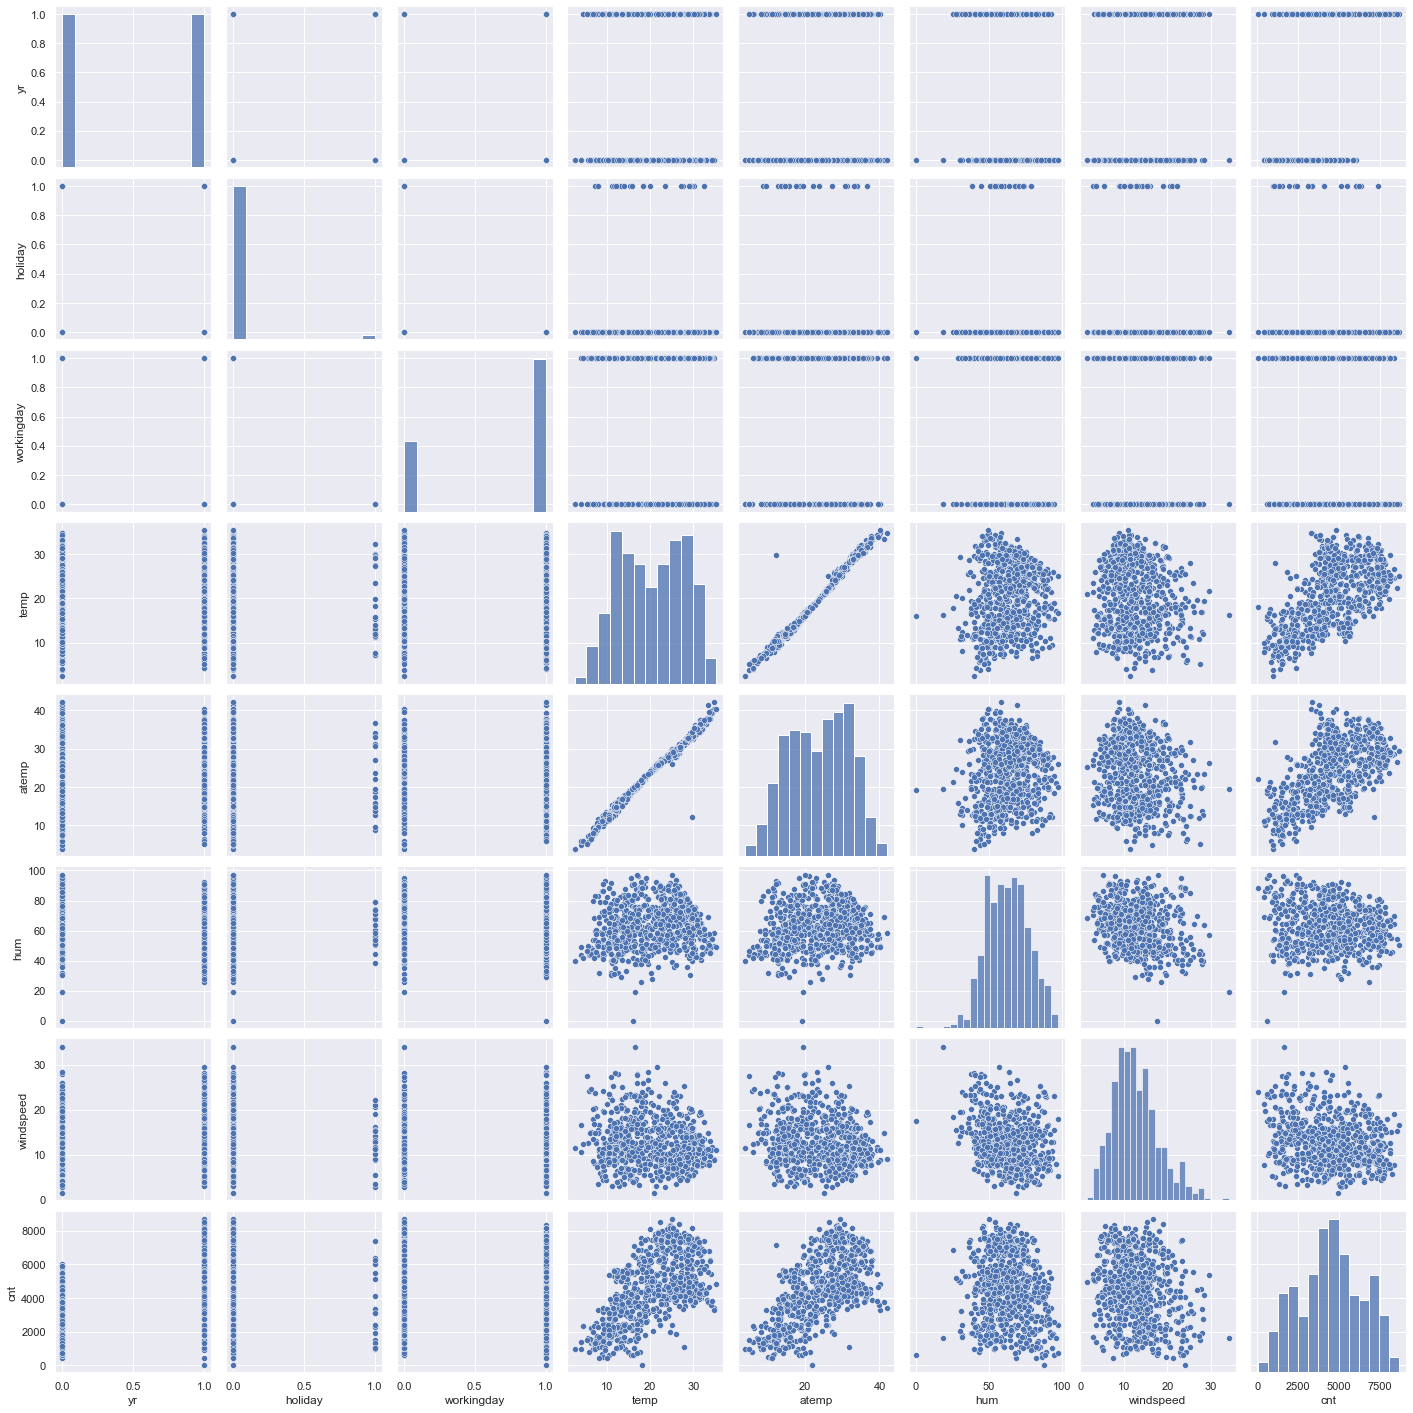

In [15]:
# Visualise the numerical Variable
sns.set(rc={'figure.figsize':(20.7,18.27)})
sns.pairplot(bikerental)
plt.show()

In [16]:
# Temperature and Count shows Linear Progress

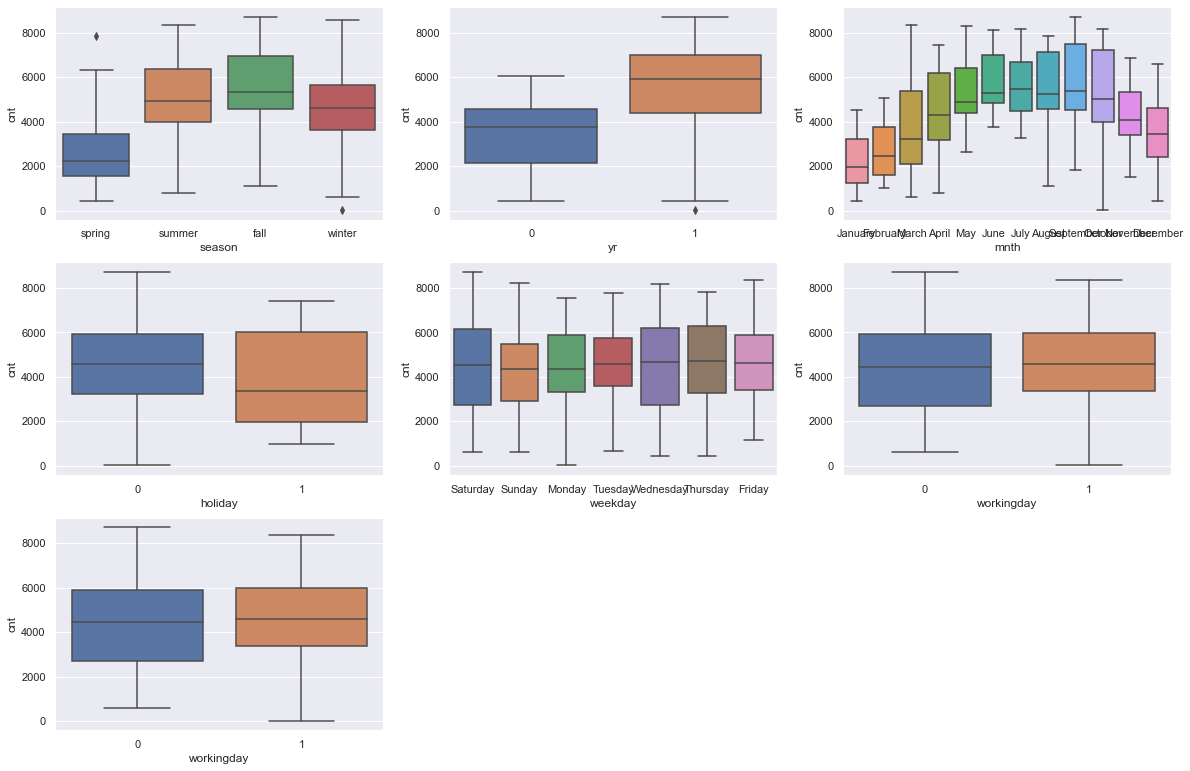

In [17]:
# Visualize categorical variable
# There are few columns which are shown in numerical graph also since the value stored for those columns are numerical but actually they are categorical
plt.figure(figsize=(20, 18))
plt.subplot(4, 3, 1)
sns.boxplot(x='season', y='cnt', data=bikerental)
plt.subplot(4, 3, 2)
sns.boxplot(x='yr', y='cnt', data=bikerental)
plt.subplot(4, 3, 3)
sns.boxplot(x='mnth', y='cnt', data=bikerental)
plt.subplot(4, 3, 4)
sns.boxplot(x='holiday', y='cnt', data=bikerental)
plt.subplot(4, 3, 5)
sns.boxplot(x='weekday', y='cnt', data=bikerental)
plt.subplot(4, 3, 6)
sns.boxplot(x='workingday', y='cnt', data=bikerental)
plt.subplot(4, 3, 7)
sns.boxplot(x='workingday', y='cnt', data=bikerental)
plt.show()

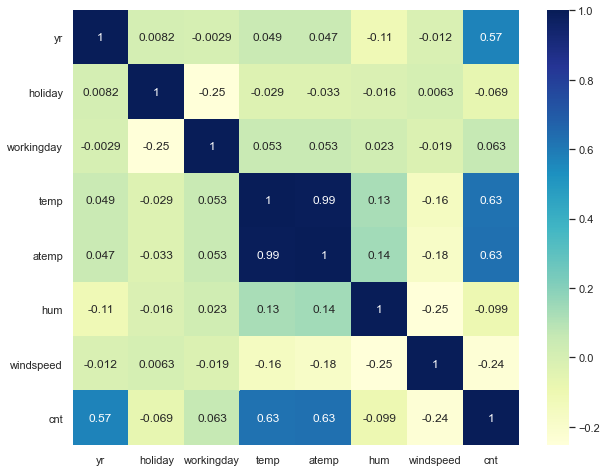

In [18]:
# Find Correlation between the variable
plt.figure(figsize=(10, 8))
sns.heatmap(bikerental.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [19]:
# Correlation between temp and atemp is 99%, so removing the column
bikerental.drop(['atemp'], axis=1, inplace=True)
bikerental.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,Clear/Partly Cloudy,8.050924,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,Clear/Partly Cloudy,8.200000,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,Clear/Partly Cloudy,9.305237,43.6957,12.522300,1600


### Preparation of Data for Modelling

In [20]:
bikerental.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [21]:
bikerental.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,Clear/Partly Cloudy,8.050924,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,Clear/Partly Cloudy,8.200000,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,Clear/Partly Cloudy,9.305237,43.6957,12.522300,1600


In [22]:
season = pd.get_dummies(bikerental.season, drop_first=True)
season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [23]:
months = pd.get_dummies(bikerental.mnth, drop_first=True)
months.head()

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [24]:
weekdays = pd.get_dummies(bikerental.weekday, drop_first=True)
weekdays.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [25]:
weathersit = pd.get_dummies(bikerental.weathersit, drop_first=True)
weathersit.head()

,Light Snow/Rain,Mist + Cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [26]:
bikerental = pd.concat([bikerental, season, months, weekdays, weathersit], axis=1)
bikerental.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow/Rain,Mist + Cloudy
0,spring,0,January,0,Saturday,0,Mist + Cloudy,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,January,0,Sunday,0,Mist + Cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,January,0,Monday,1,Clear/Partly Cloudy,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,January,0,Tuesday,1,Clear/Partly Cloudy,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,January,0,Wednesday,1,Clear/Partly Cloudy,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [27]:
bikerental.drop(['season', 'mnth', 'weekday', 'weathersit'], inplace=True, axis=1)
bikerental.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow/Rain,Mist + Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
df_train, df_test = train_test_split(bikerental, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [29]:
# Rescaling the variables
# 1. Create an Object
scaler = MinMaxScaler()

In [30]:
# Identify the columns to scale
bikerental.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Light Snow/Rain', 'Mist + Cloudy'],
      dtype='object')

In [31]:
# Create list of numeric variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
# Fit the data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train[num_vars].head()

<ipython-input-31-251b368b9438>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
/Users/swarnimsuman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,temp,hum,windspeed,cnt
576,0.815169,0.725633,0.264686,0.827658
426,0.442393,0.640189,0.255342,0.465255
728,0.245101,0.498067,0.663106,0.204096
482,0.395666,0.504508,0.188475,0.482973
111,0.345824,0.751824,0.380981,0.191095


In [32]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow/Rain,Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
y_train = df_train.pop('cnt')
X_train = df_train

### RFE
Recursive feature elimination

In [36]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 12)             # running RFE
rfe = rfe.fit(X_train, y_train)

/Users/swarnimsuman/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=12 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [37]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('August', False, 9),
 ('December', False, 6),
 ('February', False, 7),
 ('January', False, 4),
 ('July', True, 1),
 ('June', False, 16),
 ('March', False, 17),
 ('May', False, 8),
 ('November', False, 5),
 ('October', False, 15),
 ('September', True, 1),
 ('Monday', False, 11),
 ('Saturday', False, 2),
 ('Sunday', False, 10),
 ('Thursday', False, 13),
 ('Tuesday', False, 12),
 ('Wednesday', False, 14),
 ('Light Snow/Rain', True, 1),
 ('Mist + Cloudy', True, 1)]

In [38]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'July', 'September', 'Light Snow/Rain', 'Mist + Cloudy'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [52]:
# Creating X_test dataframe with RFE selected variables
X_train_new = X_train[col]

In [53]:
X_train_rfe = sm.add_constant(X_train_new)

In [54]:
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          2.95e-190
Time:                        21:12:27   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2848      0.034      8.258      0.000       0.217       0.353
yr                  0.2294      0.008     28.208      0.000       0.213       0.245
holiday            -0.0969      0.026     -3.787      0.000      -0.147      -0.047
temp                0.5299      0.034     15.728      0.000       0.464       0.596
hum                -0.1726      0.038     -4.569      0.000      -0.247      -0.098
windspeed          -0.1822      0.026     -7.074      0.000      -0.233      -0.132
spring             -0.0564      0.021     -2.700      0.007      -0.097      -0.015
summer              0.0531      0.015      3.536      0.000       0.024       0.083
winter              0.0976      0.017      5.643      0.000       0.064       0.132
July               -0.0572      0.018     -3.123      0.002      -0.093      -0.021
September           0.0833      0.017      4.973      0.000       0.050       0.116
Light Snow/Rain    -0.2369      0.026     -8.983      0.000      -0.289      -0.185
Mist + Cloudy      -0.0527      0.010     -5.017      0.000      -0.073      -0.032
==============================================================================
Omnibus:                       57.486   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.221
Skew:                          -0.612   Prob(JB):                     5.28e-29
Kurtosis:                       5.151   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,74.37
6,spring,5.02
3,temp,3.61
8,winter,3.48
7,summer,2.62
4,hum,1.89
12,Mist + Cloudy,1.56
9,July,1.48
10,September,1.30
11,Light Snow/Rain,1.24


In [44]:
X_train_rfe = X_train_rfe.drop(['spring'], axis = 1)
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'July', 'September', 'Light Snow/Rain', 'Mist + Cloudy'],
      dtype='object')

In [45]:
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.0
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          6.89e-190
Time:                        21:03:12   Log-Likelihood:                 505.58
No. Observations:                 510   AIC:                            -987.2
Df Residuals:                     498   BIC:                            -936.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2262      0.027      8.384      0.000       0.173       0.279
yr                  0.2280      0.008     27.917      0.000       0.212       0.244
holiday            -0.0989      0.026     -3.844      0.000      -0.149      -0.048
temp                0.5977      0.023     26.494      0.000       0.553       0.642
hum                -0.1841      0.038     -4.876      0.000      -0.258      -0.110
windspeed          -0.1895      0.026     -7.351      0.000      -0.240      -0.139
summer              0.0815      0.011      7.580      0.000       0.060       0.103
winter              0.1347      0.011     12.732      0.000       0.114       0.155
July               -0.0478      0.018     -2.640      0.009      -0.083      -0.012
September           0.0962      0.016      5.957      0.000       0.064       0.128
Light Snow/Rain    -0.2318      0.026     -8.757      0.000      -0.284      -0.180
Mist + Cloudy      -0.0502      0.011     -4.771      0.000      -0.071      -0.030
==============================================================================
Omnibus:                       52.291   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.838
Skew:                          -0.600   Prob(JB):                     1.72e-23
Kurtosis:                       4.869   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,44.97
4,hum,1.87
3,temp,1.60
11,Mist + Cloudy,1.55
8,July,1.43
6,summer,1.33
7,winter,1.29
10,Light Snow/Rain,1.24
9,September,1.19
5,windspeed,1.18


## Residual Analysis of the train data

In [47]:
y_train_price = lm.predict(X_train_rfe)

/Users/swarnimsuman/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

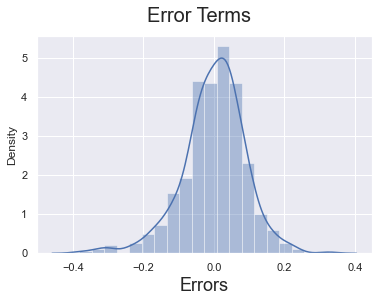

In [48]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

## Making Predictions

#### Applying the scaling on the test sets

In [49]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
# Fit the data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test[num_vars].head()

<ipython-input-49-d91007e65892>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[num_vars] = scaler.transform(df_test[num_vars])
/Users/swarnimsuman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,temp,hum,windspeed,cnt
184,0.831783,0.657364,0.084219,0.692706
535,0.901354,0.610133,0.153728,0.712034
299,0.511964,0.837699,0.334206,0.303382
221,0.881625,0.437098,0.339570,0.547400
152,0.817246,0.314298,0.537414,0.569029


#### Dividing into X_test and y_test

In [50]:
y_test = df_test.pop('cnt')
X_test = df_test

In [55]:
X_test_new = X_test[X_train_new.columns]

In [56]:
X_test_new = sm.add_constant(X_test_new)
y_pred = lm.predict(X_test_new)
y_pred.head()

184    0.389906
535    0.911470
299    0.395511
221    0.614588
152    0.618703
dtype: float64

Text(0, 0.5, 'y_pred')

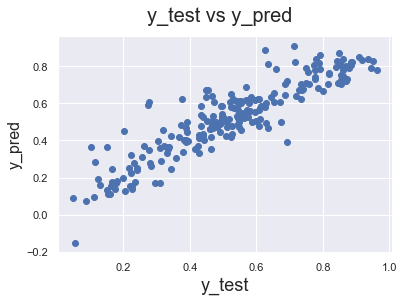

In [57]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

### R-square Value

In [58]:
r2_score(y_true=y_test, y_pred=y_pred)

0.8151738700604123

In [59]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          2.95e-190
Time:                        21:16:49   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2848      0.034      8.258      0.000       0.217       0.353
yr                  0.2294      0.008     28.208      0.000       0.213       0.245
holiday            -0.0969      0.026     -3.787      0.000      -0.147      -0.047
temp                0.5299      0.034     15.728      0.000       0.464       0.596
hum                -0.1726      0.038     -4.569      0.000      -0.247      -0.098
windspeed          -0.1822      0.026     -7.074      0.000      -0.233      -0.132
spring             -0.0564      0.021     -2.700      0.007      -0.097      -0.015
summer              0.0531      0.015      3.536      0.000       0.024       0.083
winter              0.0976      0.017      5.643      0.000       0.064       0.132
July               -0.0572      0.018     -3.123      0.002      -0.093      -0.021
September           0.0833      0.017      4.973      0.000       0.050       0.116
Light Snow/Rain    -0.2369      0.026     -8.983      0.000      -0.289      -0.185
Mist + Cloudy      -0.0527      0.010     -5.017      0.000      -0.073      -0.032
==============================================================================
Omnibus:                       57.486   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.221
Skew:                          -0.612   Prob(JB):                     5.28e-29
Kurtosis:                       5.151   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
round(lm.params, 2)

const              0.28
yr                 0.23
holiday           -0.10
temp               0.53
hum               -0.17
windspeed         -0.18
spring            -0.06
summer             0.05
winter             0.10
July              -0.06
September          0.08
Light Snow/Rain   -0.24
Mist + Cloudy     -0.05
dtype: float64

### Best Fitted Line
__cnt = 0.2848 + 0.23 * yr -0.1 * holiday + 0.53 * temp - 0.17 * hum - .18 * windspeed - 0.06 * spring + 0.05 * summer + 0.10 * winter - 0.06 * July + 0.08 * September -0.24 * (Light Snow/Rain) - 0.05 * (Mist + Cloudy)__ 

#### Demand increases for below variables
- yr
- temp
- summer
- winter
- September

#### Demand decreases for below variables
- holiday
- hum
- windspeed
- spring
- July
- (Light Snow/Rain)
- (Mist + Cloudy)

### Final Recommendation


__23% more customers joined BoomBikes ride__<br>
__During summer and winter demand of BoomBikes increases__
